In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error


# plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)

In [2]:
#Cell_2.
csv_in="yields.csv"
df=pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['time'][0]))

(12787, 216)
           time  AU01  AU02   AU03  AU05  AU07  AU10  AU15  AU20  AU30  ...  \
0  957533400000  6.28  6.34  6.460  6.52   0.0  6.56  6.56   0.0   0.0  ...   
1  957792600000  6.26  6.34  6.415  6.52   0.0  6.56  6.49   0.0   0.0  ...   
2  957879000000  6.34  6.38  6.500  6.54   0.0  6.55  6.55   0.0   0.0  ...   
3  957965400000  6.24  6.34  6.390  6.51   0.0  6.54  6.50   0.0   0.0  ...   
4  958051800000  6.22  6.26  6.374  6.42   0.0  6.41  6.42   0.0   0.0  ...   

   US03M  US06M  US01   US02   US03   US05  US07   US10  US20   US30  
0  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.511   0.0  6.157  
1  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.568   0.0  6.157  
2  5.984  6.031   0.0  6.872  4.557  6.827   0.0  6.524   0.0  6.248  
3  6.115  6.140   0.0  6.851  4.557  6.788   0.0  6.457   0.0  6.216  
4  6.083  6.104   0.0  6.804  4.557  6.668   0.0  6.420   0.0  6.154  

[5 rows x 216 columns]
<class 'numpy.int64'>


In [3]:
#Cell_3.
from datetime import datetime
for i in range(len(df)):
    df.loc[i,'time']= datetime.fromtimestamp((df.loc[i,'time']/1000))

In [4]:
#Cell_4.
display(df.head())
display(df.tail())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2000-05-05 22:30:00,6.28,6.34,6.460,6.52,0.0,6.56,6.56,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.511,0.0,6.157
1,2000-05-08 22:30:00,6.26,6.34,6.415,6.52,0.0,6.56,6.49,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.568,0.0,6.157
2,2000-05-09 22:30:00,6.34,6.38,6.500,6.54,0.0,6.55,6.55,0.0,0.0,...,5.984,6.031,0.0,6.872,4.557,6.827,0.0,6.524,0.0,6.248
3,2000-05-10 22:30:00,6.24,6.34,6.390,6.51,0.0,6.54,6.50,0.0,0.0,...,6.115,6.140,0.0,6.851,4.557,6.788,0.0,6.457,0.0,6.216
4,2000-05-11 22:30:00,6.22,6.26,6.374,6.42,0.0,6.41,6.42,0.0,0.0,...,6.083,6.104,0.0,6.804,4.557,6.668,0.0,6.420,0.0,6.154


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
12782,1973-04-03 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12783,1973-04-04 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12784,1973-04-05 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12785,1973-04-06 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12786,1973-04-09 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Cell_5.
df_sorted = df.sort_values("time")
display(df_sorted.head(20))

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
11962,1970-01-05 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11963,1970-01-06 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,1970-01-07 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11965,1970-01-08 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11966,1970-01-09 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11967,1970-01-12 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11968,1970-01-13 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11969,1970-01-14 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11970,1970-01-15 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11971,1970-01-16 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Cell_6.
df_sorted['time']=pd.to_datetime(df_sorted['time'])
df_sorted['time']=df_sorted['time'].dt.date

df_sorted=df_sorted.reset_index(drop=True)
df_sorted['time']=pd.to_datetime(df_sorted['time'])
display(df_sorted.head())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,1970-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Cell_7.
csv_in2="NY.csv"
df2=pd.read_csv(csv_in2,skiprows=0,header=0,delimiter='\t',encoding="utf-8")
print(df2.shape) #確認
print(df2.head()) #確認
print(type(df2['日時'][0]))
df2['日時']=pd.to_datetime(df2['日時'])
print(type(df2['日時'][0]))

(1401, 11)
           日時       始値       高値       安値       終値  単純移動平均1/単純移動平均  \
0  2019/02/18  28360.0  28450.0  28290.0  28350.0             NaN   
1  2019/02/19  28350.0  28400.0  28220.0  28270.0             NaN   
2  2019/02/20  28280.0  28460.0  28280.0  28340.0             NaN   
3  2019/02/21  28460.0  28650.0  28390.0  28650.0             NaN   
4  2019/02/22  28340.0  28370.0  28300.0  28360.0         28394.0   

   単純移動平均2/単純移動平均  売買高/売買高+移動平均  単純移動平均1/売買高+移動平均  単純移動平均2/売買高+移動平均  \
0             NaN          2767               NaN               NaN   
1             NaN          1849               NaN               NaN   
2             NaN          1420               NaN               NaN   
3             NaN          2464               NaN               NaN   
4             NaN          1187            1937.4               NaN   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
<class 'str'>
<class 'pandas._libs.tslibs.tim

In [7]:
#Cell_8.
df2.columns=['time','start','high','low','close','ma1','ma2','x1','x2','x3','x4']
display(df2.head())

,time,start,high,low,close,ma1,ma2,x1,x2,x3,x4
0,2019-02-18,28360.0,28450.0,28290.0,28350.0,NaN,NaN,2767,NaN,NaN,NaN
1,2019-02-19,28350.0,28400.0,28220.0,28270.0,NaN,NaN,1849,NaN,NaN,NaN
2,2019-02-20,28280.0,28460.0,28280.0,28340.0,NaN,NaN,1420,NaN,NaN,NaN
3,2019-02-21,28460.0,28650.0,28390.0,28650.0,NaN,NaN,2464,NaN,NaN,NaN
4,2019-02-22,28340.0,28370.0,28300.0,28360.0,28394.0,NaN,1187,1937.4,NaN,NaN


In [8]:
#Cell_9.
df_merged=pd.merge(df2,df_sorted,on='time',how='inner')
display(df_merged.head())

,time,start,high,low,close,ma1,ma2,x1,x2,x3,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2019-02-19,28350.0,28400.0,28220.0,28270.0,NaN,NaN,1849,NaN,NaN,...,2.4241,2.5038,2.5407,2.4996,2.4644,2.4610,2.5373,2.6375,0.0,2.9786
1,2019-02-20,28280.0,28460.0,28280.0,28340.0,NaN,NaN,1420,NaN,NaN,...,2.4456,2.5153,2.5442,2.5079,2.4699,2.4711,2.5446,2.6500,0.0,2.9968
2,2019-02-21,28460.0,28650.0,28390.0,28650.0,NaN,NaN,2464,NaN,NaN,...,2.4506,2.5153,2.5493,2.5369,2.5081,2.5184,2.5964,2.6968,0.0,3.0495
3,2019-02-22,28340.0,28370.0,28300.0,28360.0,28394.0,NaN,1187,1937.4,NaN,...,2.4552,2.5145,2.5489,2.5204,2.4779,2.4863,2.5617,2.6644,0.0,3.0231
4,2019-02-25,28580.0,28660.0,28550.0,28590.0,28442.0,NaN,1427,1669.4,NaN,...,2.4525,2.5143,2.5596,2.5078,2.4697,2.4727,2.5592,2.6644,0.0,3.0247


In [9]:
#Cell_10.
df_merged=df_merged[['time','close','US01','US02']]

print(df_merged.shape)
print(df_merged.info())
display(df_merged.head())

(335, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    335 non-null    datetime64[ns]
 1   close   335 non-null    float64       
 2   US01    335 non-null    float64       
 3   US02    335 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 13.1 KB
None


,time,close,US01,US02
0,2019-02-19,28270.0,2.5407,2.4996
1,2019-02-20,28340.0,2.5442,2.5079
2,2019-02-21,28650.0,2.5493,2.5369
3,2019-02-22,28360.0,2.5489,2.5204
4,2019-02-25,28590.0,2.5596,2.5078


In [10]:
#Cell_11.
df_merged=df_merged.fillna(method="ffill")

In [11]:
#Cell_12.
df_d=df_merged.copy()
df_d['time']-=df_d['time'][0]
#print(type(df_d['time'][0]))
df_d['time']/=np.timedelta64(1,'D')
#print(type(df_d['日付'][0]))
print(df_d.head())

   time    close    US01    US02
0   0.0  28270.0  2.5407  2.4996
1   1.0  28340.0  2.5442  2.5079
2   2.0  28650.0  2.5493  2.5369
3   3.0  28360.0  2.5489  2.5204
4   6.0  28590.0  2.5596  2.5078


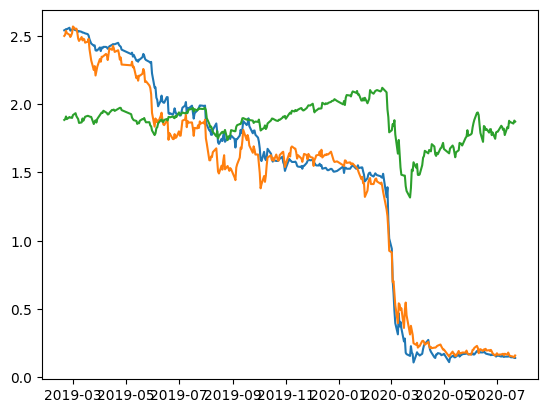

In [12]:
#Cell_13.
plt.plot(df_merged['time'],df_merged['US01'])
plt.plot(df_merged['time'],df_merged['US02'])
plt.plot(df_merged['time'],df_merged['close']/15000)
plt.show()

In [13]:
#Cell_14.
X = df_d[['time','US01','US02']]
Y = df_d[['close']]

In [24]:
X

,time,US01,US02
0,0.0,2.5407,2.4996
1,1.0,2.5442,2.5079
2,2.0,2.5493,2.5369
3,3.0,2.5489,2.5204
4,6.0,2.5596,2.5078
...,...,...,...
330,513.0,0.1523,0.1556
331,514.0,0.1472,0.1558
332,517.0,0.1472,0.1514
333,518.0,0.1421,0.1470


In [14]:
#Cell_15.
X_c=sm.add_constant(X)
model=sm.OLS(Y,X_c)

In [15]:
#Cell_16.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     425.0
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          3.98e-113
Time:                        14:14:39   Log-Likelihood:                -2771.4
No. Observations:                 335   AIC:                             5551.
Df Residuals:                     331   BIC:                             5566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.103e+04    559.935     19.694      0.0

In [16]:
#Cell_17.
X_dumm=X.copy()
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(Y)

model = sm.OLS(y_scaled_ar, X_scaled_ar)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              426.2
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                   1.81e-113
Time:                        14:15:08   Log-Likelihood:                         -210.81
No. Observations:                 335   AIC:                                      427.6
Df Residuals:                     332   BIC:                                      439.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
#Cell_18.
X_test = pd.DataFrame(
    [
        [50, 0.25, 0.25],
        [100, 0.35, 0.45]
    ],
    columns=["time", "US01", "US"],
)
X_test = sm.add_constant(X_test)

print('X for prediction:')
display(X_test)

X for prediction:


,const,time,US01,US
0,1.0,50,0.25,0.25
1,1.0,100,0.35,0.45


In [32]:
#Cell_19.
y_test = results.predict(X_test)
print('Predicted y:')
print(y_test)

Predicted y:
0    14142.659346
1    16353.257878
dtype: float64
